<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/Actuator_project_using_window_size_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

data=pd.read_csv("/content/3p5_1.csv",index_col="0")
data1=pd.read_csv("/content/4p0_1.csv",index_col="0")
data2=pd.read_csv("/content/4p5_1.csv",index_col="0")
data3=pd.read_csv("/content/5p0_1.csv",index_col="0")
data4=pd.read_csv("/content/5p5_1.csv",index_col="0")



In [3]:
#removing all zero-ed rows ..

zero_sum_rows=data[data.apply(lambda row:row.sum()==0,axis=1)].index
data=data.drop(zero_sum_rows)
data.head()
data.shape  #(60643, 11)



(60643, 11)

In [4]:
print(data)

           0.1    0.2  0.3    0.4  0.5    0.6    0.7    0.8    0.9     0.10  \
0                                                                             
2251.06 -0.006  1.007    0 -0.058  0.2  0.000  0.204  3.059  0.036    0.000   
2251.07 -0.010  0.699    0 -0.058  0.2 -1.320  0.204  3.055  0.241    0.010   
2251.08 -0.004  0.858    0 -0.736  0.2 -2.280  0.204  3.065  0.033    0.020   
2251.09 -0.007  0.908    0 -2.164  0.2 -2.660  0.204  3.054  0.242    0.030   
2251.10 -0.012  0.838    0 -2.849  0.2 -2.530  0.204  3.052  0.036    0.040   
...        ...    ...  ...    ...  ...    ...    ...    ...    ...      ...   
2857.44  0.080  1.305    0  3.325  0.0  5.420  0.000  2.777  0.103  606.381   
2857.45  0.063  0.977    0  4.298  0.0  6.435  0.000  2.810  0.207  606.391   
2857.46  0.063  1.216    0  5.409  0.0  7.366  0.000  2.849  0.100  606.401   
2857.47  0.051  0.878    0  6.325  0.0  8.044  0.000  2.854  0.205  606.411   
2857.48  0.055  1.126    0  6.995  0.0  8.822  0.000

In [7]:

zero_sum_rows=data1[data1.apply(lambda row:row.sum()==0,axis=1)].index   # the axis=1 is row ,,
data1=data1.drop(zero_sum_rows)
data1.shape

zero_sum_rows=data2[data2.apply(lambda row:row.sum()==0,axis=1)].index
data2=data2.drop(zero_sum_rows)


zero_sum_rows=data3[data3.apply(lambda row:row.sum()==0,axis=1)].index
data3=data3.drop(zero_sum_rows)


zero_sum_rows=data4[data4.apply(lambda row:row.sum()==0,axis=1)].index
data4=data4.drop(zero_sum_rows)
data4.shape  #(23026, 11)





(23026, 11)

In [8]:
print(data4)

           0.1     0.2  0.3    0.4   0.5   0.6    0.7    0.8    0.9    0.10  \
0                                                                             
4495.05 -0.013   1.375    0 -0.050  0.20  0.00  0.204  3.072  0.004    0.00   
4495.06 -0.015   1.106    0 -0.050  0.20 -4.03  0.204  3.050  0.286    0.01   
4495.07  0.003   1.126    0 -1.630  0.20 -7.09  0.204  3.069  0.003    0.02   
4495.08 -0.004   1.146    0 -6.173  0.20 -8.65  0.204  3.059  0.285    0.03   
4495.09 -0.008   0.878    0 -9.361  0.20 -9.86  0.204  3.061  0.005    0.04   
...        ...     ...  ...    ...   ...   ...    ...    ...    ...     ...   
4725.26  1.375  13.924    0 -0.469  2.06  0.00  0.064  2.043  0.172  230.21   
4725.27  1.381  13.824    0 -0.469  2.06  0.00  0.064  2.017  0.410  230.22   
4725.28  1.389  14.152    0 -0.469  2.06  0.00  0.064  2.033  0.177  230.23   
4725.29  1.405  14.083    0 -0.469  2.06  0.00  0.064  2.057  0.421  230.24   
4725.30  1.421  14.132    0 -0.469  2.06  0.00  0.06

In [9]:
# merging of data frames;;
listOfframes=[data,data1,data2,data3,data4]
data=pd.concat(listOfframes)
data.head()
data.shape  #(217329, 11)



(217329, 11)

In [ ]:
data.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11
0,,,,,,,,,,,
2251.06,-0.006,1.007,0,-0.058,0.2,0.00,0.204,3.059,0.036,0.00,0.00
2251.07,-0.010,0.699,0,-0.058,0.2,-1.32,0.204,3.055,0.241,0.01,0.01
2251.08,-0.004,0.858,0,-0.736,0.2,-2.28,0.204,3.065,0.033,0.02,0.02
2251.09,-0.007,0.908,0,-2.164,0.2,-2.66,0.204,3.054,0.242,0.03,0.03
2251.10,-0.012,0.838,0,-2.849,0.2,-2.53,0.204,3.052,0.036,0.04,0.04


In [ ]:
# sorting the data on  the  basis of time ..
data=data.sort_values(by="0")
data.head()


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11
0,,,,,,,,,,,
2251.06,-0.006,1.007,0,-0.058,0.2,0.00,0.204,3.059,0.036,0.00,0.00
2251.07,-0.010,0.699,0,-0.058,0.2,-1.32,0.204,3.055,0.241,0.01,0.01
2251.08,-0.004,0.858,0,-0.736,0.2,-2.28,0.204,3.065,0.033,0.02,0.02
2251.09,-0.007,0.908,0,-2.164,0.2,-2.66,0.204,3.054,0.242,0.03,0.03
2251.10,-0.012,0.838,0,-2.849,0.2,-2.53,0.204,3.052,0.036,0.04,0.04


In [10]:
# requiring only column 1, 8 as predictors and 2nd as prediction ..
data.head()
data_=data.iloc[:,[0,7,1]]
type(data_)  # dataframes,,
print(data_.head(200))
data_.shape



           0.1    0.8    0.2
0                           
2251.06 -0.006  3.059  1.007
2251.07 -0.010  3.055  0.699
2251.08 -0.004  3.065  0.858
2251.09 -0.007  3.054  0.908
2251.10 -0.012  3.052  0.838
...        ...    ...    ...
2253.01  0.479  1.745  0.878
2253.02  0.469  1.759  0.451
2253.03  0.447  1.768  0.739
2253.04  0.443  1.753  0.480
2253.05  0.434  1.756  0.798

[200 rows x 3 columns]


(217329, 3)

from here data is _data

In [11]:
# changing column names..

current_col_names=list(data_.columns)
print(current_col_names)
current_col_names[0]="pressure_predictor1"
current_col_names[1]="strain_predictor2"
current_col_names[2]="force_prediction"
data_.columns=current_col_names
print(data_.head())
data_.shape




['0.1', '0.8', '0.2']
         pressure_predictor1  strain_predictor2  force_prediction
0                                                                
2251.06               -0.006              3.059             1.007
2251.07               -0.010              3.055             0.699
2251.08               -0.004              3.065             0.858
2251.09               -0.007              3.054             0.908
2251.10               -0.012              3.052             0.838


(217329, 3)

In [ ]:
# min-max_scalling...

for i in range (0,3):
  c_column = data_.iloc[:, i].copy()
  min_c=c_column.min()
  max_c=c_column.max()

  if max_c-min_c==0:
     data_.iloc[:,i]=0.0
  else:
     data_.iloc[:,i]=(c_column-min_c)/(max_c-min_c)  # min-max scalling
data_.head()




,pressure_predictor1,strain_predictor2,force_prediction
0,,,
2251.06,0.006512,0.981476,0.061139
2251.07,0.004651,0.980198,0.050494
2251.08,0.007442,0.983392,0.055989
2251.09,0.006047,0.979879,0.057718
2251.10,0.003721,0.979240,0.055298


In [ ]:
"""X=data_.iloc[:,:2].values
print(X)
X.shape"""

[[0.00651163 0.98147557]
 [0.00465116 0.98019802]
 [0.00744186 0.98339189]
 ...
 [0.65534884 0.65378473]
 [0.6627907  0.66145002]
 [0.67023256 0.6617694 ]]


(217329, 2)

In [ ]:
"""Y=data_.iloc[:,2].values
print(Y)
Y.shape"""

[0.06113914 0.05049423 0.05598949 ... 0.51544895 0.51306422 0.51475772]


(217329,)

In [ ]:
data_.head()

,pressure_predictor1,strain_predictor2,force_prediction
0,,,
2251.06,0.006512,0.981476,0.061139
2251.07,0.004651,0.980198,0.050494
2251.08,0.007442,0.983392,0.055989
2251.09,0.006047,0.979879,0.057718
2251.10,0.003721,0.979240,0.055298


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
df=data_.copy()

df.head(15)

,pressure_predictor1,strain_predictor2,force_prediction
0,,,
2251.06,0.006512,0.981476,0.061139
2251.07,0.004651,0.980198,0.050494
2251.08,0.007442,0.983392,0.055989
2251.09,0.006047,0.979879,0.057718
2251.10,0.003721,0.979240,0.055298
2251.11,0.001860,0.981476,0.052879
2251.12,0.004186,0.989780,0.060448
2251.13,0.004186,0.984989,0.053570
2251.14,0.002326,0.976685,0.058720


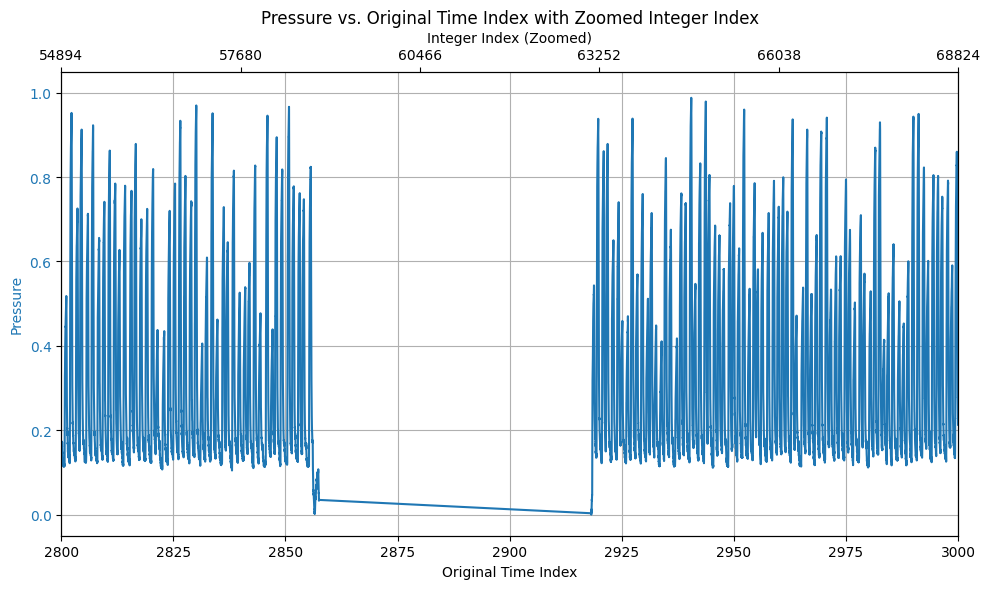

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'df' with a float index
# and a 'pressure_predictor1' column

fig, ax1 = plt.subplots(figsize=(10, 6))
start_time = 2800
end_time = 3000

color = 'tab:blue'
ax1.set_xlabel('Original Time Index')
ax1.set_ylabel('Pressure', color=color)
ax1.plot(df.index, df['pressure_predictor1'], color=color)
ax1.set_xlim(start_time, end_time)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a secondary x-axis
ax2 = ax1.twiny()

# Get the new integer index range corresponding to the zoomed time range
start_index = df.index[df.index >= start_time].min()
end_index = df.index[df.index <= end_time].max()

start_loc = df.index.get_loc(start_index)
end_loc = df.index.get_loc(end_index)

# Set the limits of the secondary x-axis to match the zoomed integer index range
ax2.set_xlim(start_loc, end_loc)
ax2.set_xlabel('Integer Index (Zoomed)')
ax2.tick_params(axis='x')

# Adjust the tick locations and labels for ax2 to be more meaningful
integer_ticks = range(start_loc, end_loc + 1, max(1, (end_loc - start_loc) // 5)) # Adjust step as needed
ax2.set_xticks(integer_ticks)

plt.title('Pressure vs. Original Time Index with Zoomed Integer Index')
plt.tight_layout()
plt.show()

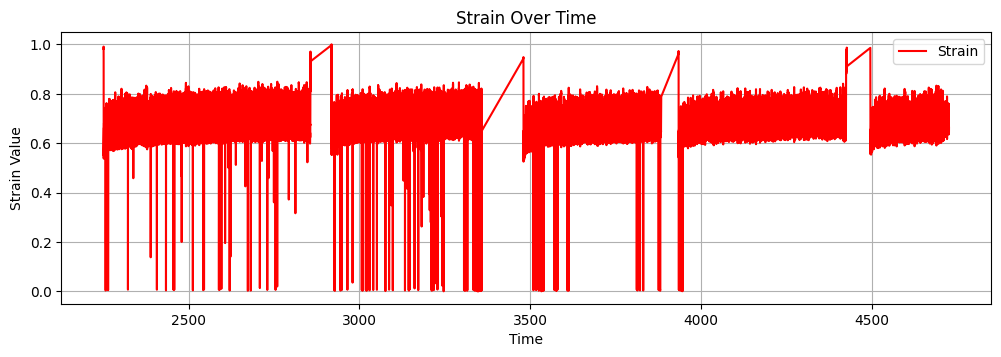

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)  # means we fix the graph in these 3 rows and 1 column of the whole graph of 12,12,, and the 1 is the nth no ...
plt.plot(df.index,df["strain_predictor2"],label="Strain",color="red")
plt.title("Strain Over Time")
plt.xlabel("Time")
plt.ylabel("Strain Value")
plt.legend()
plt.grid(True)


(3300.0, 3500.0)

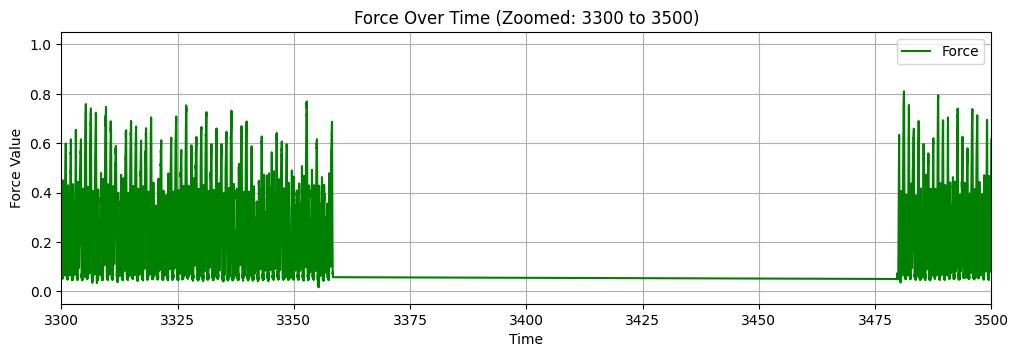

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
start_time=3300
end_time=3500
plt.plot(df.index,df["force_prediction"],label="Force",color="green")
plt.title(f"Force Over Time (Zoomed: {start_time} to {end_time})")
plt.xlabel("Time")
plt.ylabel("Force Value")
plt.legend()
plt.grid(True)
plt.xlim(start_time, end_time)


In [ ]:
"""df_2=df.copy()
df_2=df.reset_index(drop=True)
df_2.head()"""

'df_2=df.copy()\ndf_2=df.reset_index(drop=True)\ndf_2.head()'

In [ ]:
"""plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)  # means we fix the graph in these 3 rows and 1 column of the whole graph of 12,12,, and the 1 is the nth no ...
plt.plot(df_2.index,df["strain_predictor2"],label="Strain",color="red")
plt.title("Strain Over Time")
plt.xlabel("Time")
plt.ylabel("Strain Value")
plt.legend()
plt.grid(True)"""


'plt.figure(figsize=(12, 12))\nplt.subplot(3,1,1)  # means we fix the graph in these 3 rows and 1 column of the whole graph of 12,12,, and the 1 is the nth no ...\nplt.plot(df_2.index,df["strain_predictor2"],label="Strain",color="red")\nplt.title("Strain Over Time")\nplt.xlabel("Time")\nplt.ylabel("Strain Value")\nplt.legend()\nplt.grid(True)'

In [18]:
# converting dataframe to numpy array..for working on lstm,,

dn=data_[["pressure_predictor1","strain_predictor2","force_prediction"]].values

"""dn1=dn[0:50,:]
dn2=dn[50:100,:]
print(dn2)"""

'dn1=dn[0:50,:]\ndn2=dn[50:100,:]\nprint(dn2)'

In [19]:
print(dn)

[[-6.0000e-03  3.0590e+00  1.0070e+00]
 [-1.0000e-02  3.0550e+00  6.9900e-01]
 [-4.0000e-03  3.0650e+00  8.5800e-01]
 ...
 [ 1.3890e+00  2.0330e+00  1.4152e+01]
 [ 1.4050e+00  2.0570e+00  1.4083e+01]
 [ 1.4210e+00  2.0580e+00  1.4132e+01]]


In [20]:
def create_sequences(data, time_steps, step_size):
    X = []
    y = []

    for i in range(0, len(data) - time_steps, step_size):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])

    return np.array(X), np.array(y)

"""gap_starts = [58000,100500,142680,190000]  ## are gap starting indices..
gap_ends = [60000,106600,146000,194300]  """  ## are gap ending indices..
time_steps_list_to_test = [60] #,5,0,20,30,35,40,50,55,60,65]   ## All < 65
step_size = 30  # 30ms step size for overlapping #50% of the time-step..

all_X = []
all_y = []
data_length = len(data_)

start_index = 0
end_index = data_length
if end_index > start_index:
    data_segment = dn[start_index:end_index]
    for ts in time_steps_list_to_test:
        if len(data_segment) > ts:
            X_seg, y_seg = create_sequences(data_segment, ts, step_size)
            all_X.append(X_seg)
            all_y.append(y_seg)


"""
##these all are required only if u apply to gaps##

print(len(all_X[0][1][1])) # 2 ie, the no of predictors are 2..
print(len(all_X[0][1])) #30 ie the no of time_size=30.."""
"""
# Process data between the gaps
for i in range(len(gap_starts) - 1):
    start_index = gap_ends[i]
    end_index = gap_starts[i + 1]
    if end_index > start_index:
        data_segment = dn[start_index:end_index]
        for ts in time_steps_list_to_test:
            if len(data_segment) > ts:
               X_seg, y_seg = create_sequences(data_segment, ts)
               all_X.append(X_seg)
               all_y.append(y_seg)

# Process data after the last gap
start_index = gap_ends[-1]
end_index = data_length
if end_index > start_index:
    data_segment = dn[start_index:end_index]
    for ts in time_steps_list_to_test:
            if len(data_segment) > ts:
               X_seg, y_seg = create_sequences(data_segment, ts)
               all_X.append(X_seg)
               all_y.append(y_seg)"""


for i, x in enumerate(all_X):
    print(f"all_X[{i}] shape: {x.shape}")
for i, y in enumerate(all_y):
    print(f"all_y[{i}] shape: {y.shape}")

    """all_X[0] shape: (57970, 30, 2)  #a 3d array is there which contains, 57970 sequences which are each (30,2) 2-d array sized  ...
all_X[1] shape: (40470, 30, 2)
all_X[2] shape: (36050, 30, 2)
all_X[3] shape: (43970, 30, 2)
all_X[4] shape: (22999, 30, 2)"""

all_X = np.concatenate(all_X, axis=0)
all_y = np.concatenate(all_y, axis=0)  #not np.array() because,the axis 0 can be misconfusing ,, but  providing axis=0 we concate through axis=1 and axis=2,, ie the window_size and the no of features respectively..



all_X[0] shape: (7243, 60, 2)
all_y[0] shape: (7243,)


In [ ]:
"""data_.head()"""

(217329, 3)

In [21]:

X=all_X
Y=all_y
#shuffling as a whole..
indices=np.random.permutation(len(X))       # indices=array([4052, 109, 7011, 3230, 582, ..., 693])
X=X[indices]
Y=Y[indices]
"""
X=all_X;
Y=all_y;
indices=np.random.permutation(len(X))
X=X[indices]
"""

'\nX=all_X;\nY=all_y;\nindices=np.random.permutation(len(X))\nX=X[indices]\n'

In [22]:
#train-test and unseen data  split..
from sklearn.model_selection import train_test_split

X_temp,X_unseen,y_temp,y_unseen=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=False) # here shuffle is false must be false because, lstm is time-series analysis and order of the dataset is very important...

In [23]:
#train-test split..
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_temp,y_temp,test_size=0.2,random_state=42,shuffle=False) # here shuffle is false must be false because, lstm is time-series analysis and order of the dataset is very important...

In [ ]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [ ]:
#Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
model=Sequential()
model.add(LSTM(units=64,input_shape=(X_train.shape[1],X_train.shape[2])))   # this X_train.shape gives an array like[54750,30,2] where 54750 is no of samples and 30 is the time-size or window-size and 2 is the no of features..
model.add(Dense(units=1))  # actually using model.add(Dense(1, activation='linear')),,, as this is self implied for regression...

model.compile(optimizer="adam",loss=root_mean_squared_error)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##early stoppings..###

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# train the model..
history=model.fit(
    X_train, y_train,validation_data=(X_test,y_test),
    epochs=40,
    batch_size=4,
    callbacks=early_stopping
)

Epoch 1/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 0.1496 - val_loss: 0.1501
Epoch 2/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.1471 - val_loss: 0.1664
Epoch 3/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.1494 - val_loss: 0.1464
Epoch 4/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - loss: 0.1484 - val_loss: 0.1447
Epoch 5/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.1477 - val_loss: 0.1513
Epoch 6/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - loss: 0.1462 - val_loss: 0.1427
Epoch 7/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.1493 - val_loss: 0.1518
Epoch 8/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 0.1383 - val_loss: 0.1534
Epoch 9/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.1447 - val_loss: 0.1421
Epoch 10/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.1414 - val_loss: 0.1424
Epoch 11/40
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.1392 - val_loss: 0.1389
Epoch 12

In [ ]:
"""# min-max_scalling...

for i in range (0,3):
  c_column = data_.iloc[:, i].copy()
  min_c=c_column.min()
  max_c=c_column.max()

  if max_c-min_c==0:
     data_.iloc[:,i]=0.0
  else:
     data_.iloc[:,i]=(c_column-min_c)/(max_c-min_c)  # min-max scalling
data_.head()"""

In [ ]:
#unscalling of the rmse..

loss=model.evaluate(X_test,y_test,batch_size=1)     # loss on unseen data .....  # by default the batch_size on unseen data is 32;
min_val=data["0.2"].min()
max_val=data["0.2"].max()

if(max_val-min_val==0):
  loss_unscaled=0.0;
else:

    loss_unscaled = (loss) * (max_val - min_val)

print(min_val,max_val)





1159/1159 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0968
-0.762 28.172


In [ ]:
print(round(loss_unscaled,2))  #model’s average prediction error is ~3.49 units

2.78


In [ ]:
#relative rmse for finding whether the model is acceptable or not ..
relative_rmse=loss_unscaled/(max_val-min_val)
print(round(relative_rmse*100,2))
#9-12.07% error is comming which is considered to be good until it is 15%..in real world scenario..

9.6


 # unseen data losses calculation....changing the batch_size This only affects speed and memory usage, not the final output values.


In [ ]:
y_pred=model.predict(X_unseen,batch_size=4)

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


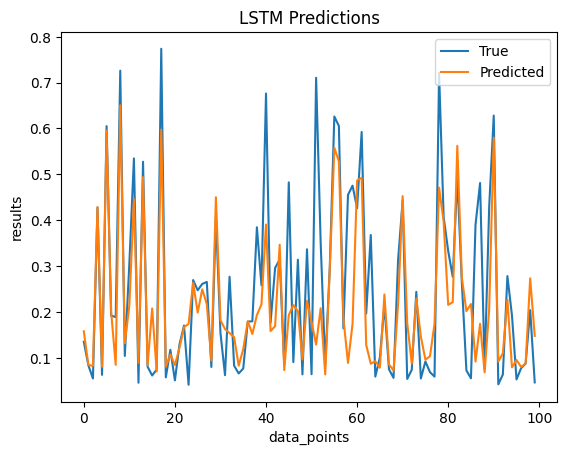

In [ ]:
     # unseen data losses calculation....changing the batch_size This only affects speed and memory usage, not the final output values.

# no accuarcy_score for regression
import matplotlib.pyplot as plt
plt.plot(y_unseen[:100], label='True')
plt.plot(y_pred[:100],label="Predicted")
plt.xlabel("data_points")
plt.ylabel("results")
plt.legend()  # will show the label's defined for each
plt.title("LSTM Predictions")
plt.show()



In [ ]:
"""import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper right")
plt.show()"""

'import matplotlib.pyplot as plt\n\nplt.plot(history.history["loss"])\nplt.plot(history.history["val_loss"])\nplt.title("model loss")\nplt.ylabel("loss")\nplt.xlabel("epoch")\nplt.legend(["train","test"],loc="upper right")\nplt.show()'

In [ ]:
#upto 60 time-step is done and the loss is reduced ... loss is ..0.034822024405002594
